# Host Data Preprocessing:
This notebook was used to generate the 'host_data.csv' file, which is loaded as a pandas DataFrame in the Host Analysis Tool.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from time import strptime

In [2]:
# read the csv file from the location where it is downloaded (as DataFrame)
data = pd.read_csv('listings_detailed.csv')

# check the first 5 lines of the pandas dataframe
# data.head()

c:\Users\20174216\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Change data types for selected attributes
data['price'] = data['price'].replace({'\$':'', ',':'', '\(':''}, regex = True).astype(float)
data['host_response_rate'] = data['host_response_rate'].replace({'%':''}, regex = True).astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'].replace({'%':''}, regex = True).astype(float)

In [4]:
# Compare review scores attributes
print(data["review_scores_rating"].describe(), data["review_scores_value"].describe())

count    31519.000000
mean         4.627864
std          0.735219
min          0.000000
25%          4.590000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64 count    31049.000000
mean         4.651498
std          0.489302
min          0.000000
25%          4.560000
50%          4.780000
75%          4.980000
max          5.000000
Name: review_scores_value, dtype: float64


In [5]:
# Compare review count attributes
print(data["number_of_reviews"].describe(), data["reviews_per_month"].describe())

count    39881.000000
mean        26.690855
std         56.256044
min          0.000000
25%          1.000000
50%          5.000000
75%         25.000000
max       1480.000000
Name: number_of_reviews, dtype: float64 count    31519.000000
mean         1.244733
std          1.991702
min          0.010000
25%          0.140000
50%          0.560000
75%          1.790000
max        123.000000
Name: reviews_per_month, dtype: float64


In [6]:
# Compare host listings count attributes in dataset
print(data["host_total_listings_count"].describe(), data["host_listings_count"].describe(), data["calculated_host_listings_count"].describe())

count    39831.000000
mean        91.357937
std        571.165811
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       6958.000000
Name: host_total_listings_count, dtype: float64 count    39831.000000
mean        68.147096
std        443.617582
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4022.000000
Name: host_listings_count, dtype: float64 count    39881.000000
mean        16.931396
std         59.597136
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        453.000000
Name: calculated_host_listings_count, dtype: float64


<AxesSubplot:ylabel='Frequency'>

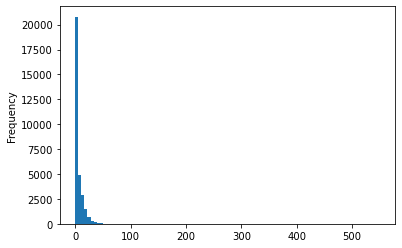

In [7]:
# Add succes metric attribute to dataframe
data['success_metric'] = data['review_scores_rating']*data['reviews_per_month']
data["success_metric"].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

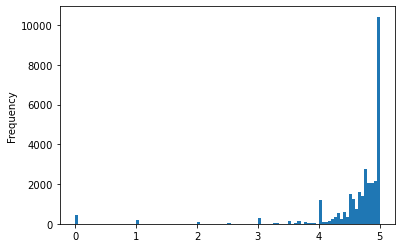

In [8]:
# Plot distribution of rating scores
data["review_scores_rating"].plot(kind='hist', bins=100)

In [9]:
# Compare total number of rows and number of rows where number_of_review_ltm >= 1
print(data["number_of_reviews_ltm"].count(), data[data["number_of_reviews_ltm"] >= 1]["id"].count())

39881 20322


In [10]:
# Create a list with the host id's
host_id_lst = data["host_id"].unique()
print('Unique hosts:', len(host_id_lst), f'\n{host_id_lst}')

Unique hosts: 26292 
[     2787      2845      7356 ... 371552251 151487807     46201]


In [11]:
# Compute mean rating/price/success_metric and add to dictionaries with host_id as key
host_avg_rating_dct = {}
host_avg_price_dct = {}
host_avg_success_metric_dct = {}

for id in host_id_lst:
    host_avg_rating = data[data["host_id"]==id]["review_scores_rating"].mean()
    host_avg_rating_dct[id] = host_avg_rating

    host_avg_price =  data[data["host_id"]==id]["price"].mean()
    host_avg_price_dct[id] = host_avg_price

    host_avg_success_metric =  data[data["host_id"]==id]["success_metric"].mean()
    host_avg_success_metric_dct[id] = host_avg_success_metric

In [12]:
# Compute mean review_cleanliness_score and add to dictionaries with host_id as key 
host_avg_review_cleanliness_dct = {}

for id in host_id_lst:
    host_avg_review_cleanliness = data[data["host_id"]==id]["review_scores_cleanliness"].mean()
    host_avg_review_cleanliness_dct[id] = host_avg_review_cleanliness

In [13]:
# Compute mean review_checkin_score and add to dictionaries with host_id as key 
host_avg_review_checkin_dct = {}

for id in host_id_lst:
    host_avg_review_checkin = data[data["host_id"]==id]["review_scores_checkin"].mean()
    host_avg_review_checkin_dct[id] = host_avg_review_checkin

In [14]:
# Compute mean review_communication_score and add to dictionaries with host_id as key 
host_avg_review_communication_dct = {}

for id in host_id_lst:
    host_avg_review_communication = data[data["host_id"]==id]["review_scores_communication"].mean()
    host_avg_review_communication_dct[id] = host_avg_review_communication

host_avg_review_communication_dct

{2787: 4.9075,
 2845: 4.933333333333334,
 7356: 4.84,
 204539: 4.882,
 7378: 5.0,
 204586: nan,
 417504: 4.861666666666667,
 8967: 4.46,
 434987: 4.76,
 867225: 4.87,
 7490: 4.95,
 9744: 4.83,
 210746: 4.883333333333334,
 35935: 4.75,
 438133: 4.915,
 15991: 4.8,
 236421: nan,
 16104: 5.0,
 244071: 4.97,
 449787: 4.92,
 16800: 4.95,
 451545: 4.95,
 17297: 5.0,
 453519: 4.82,
 17571: 4.9,
 21207: 4.6,
 209460: 4.773333333333333,
 253385: nan,
 25183: 4.885,
 30193: 5.0,
 32045: 4.84,
 503800: 4.97,
 473113: 4.96,
 27848: 4.529999999999999,
 34866: 5.0,
 258164: 4.88,
 131716: 4.8,
 509918: 5.0,
 45445: nan,
 116599: 4.984999999999999,
 168525: 4.885,
 46978: 4.855,
 264928: 4.97,
 50124: 4.91,
 256161: 4.73,
 520279: 5.0,
 526805: 4.96,
 50148: 4.52,
 272006: 4.9,
 54275: 4.926666666666667,
 199392: 4.94,
 526105: 4.91,
 56104: 4.53,
 530032: 4.97,
 274557: 4.94,
 56246: 4.93,
 275578: 4.99,
 465278: 4.93,
 276291: 4.904999999999999,
 59734: 4.76,
 220001: 4.77,
 60049: 4.84,
 277379: 4

In [15]:
# Compute mean review_location_score and add to dictionaries with host_id as key 
host_avg_review_location_dct = {}

for id in host_id_lst:
    host_avg_review_location = data[data["host_id"]==id]["review_scores_location"].mean()
    host_avg_review_location_dct[id] = host_avg_review_location

host_avg_review_location_dct

{2787: 4.7124999999999995,
 2845: 4.9366666666666665,
 7356: 4.32,
 204539: 4.640000000000001,
 7378: 4.67,
 204586: nan,
 417504: 4.525666666666666,
 8967: 4.88,
 434987: 4.82,
 867225: 4.89,
 7490: 4.94,
 9744: 4.88,
 210746: 4.86,
 35935: 4.555999999999999,
 438133: 4.96,
 15991: 4.67,
 236421: nan,
 16104: 5.0,
 244071: 4.95,
 449787: 4.83,
 16800: 4.84,
 451545: 4.91,
 17297: 5.0,
 453519: 4.18,
 17571: 4.9350000000000005,
 21207: 5.0,
 209460: 4.53,
 253385: nan,
 25183: 4.605,
 30193: 4.95,
 32045: 4.84,
 503800: 4.74,
 473113: 4.56,
 27848: 4.0125,
 34866: 4.6,
 258164: 4.49,
 131716: 4.9,
 509918: 4.43,
 45445: nan,
 116599: 4.87,
 168525: 4.855,
 46978: 4.76,
 264928: 4.86,
 50124: 4.89,
 256161: 4.48,
 520279: 4.67,
 526805: 4.8,
 50148: 4.03,
 272006: 4.91,
 54275: 4.6866666666666665,
 199392: 4.89,
 526105: 5.0,
 56104: 4.75,
 530032: 4.52,
 274557: 4.88,
 56246: 4.8,
 275578: 4.97,
 465278: 4.88,
 276291: 4.63,
 59734: 4.85,
 220001: 4.74,
 60049: 4.72,
 277379: 4.66,
 60

In [16]:
# Compute mean review_value_score and add to dictionaries with host_id as key 
host_avg_review_value_dct = {}

for id in host_id_lst:
    host_avg_review_value = data[data["host_id"]==id]["review_scores_value"].mean()
    host_avg_review_value_dct[id] = host_avg_review_value

# host_avg_review_value_dct

In [17]:
# Create dataframe for host data
host_data = pd.DataFrame(columns=['host_id', 'host_name', 'calculated_listing_count', 'host_url', 'host_neighbourhood', 'host_since', 'host_location', 'host_about',\
        'host_has_profile_pic', 'host_identity_verified', 'avg_rating', 'avg_price', 'avg_success_metric', 'avg_cleanliness_rating', 'avg_checkin_rating',\
        'avg_communication_rating', 'avg_location_rating', 'avg_value_rating'])
host_data

for id in host_id_lst:
        host_name = data[data["host_id"]==id]['host_name'].iloc[0]
        calc_listing_count = data[data["host_id"]==id]['host_listings_count'].iloc[0]
        host_url = data[data["host_id"]==id]['host_url'].iloc[0]
        host_neighbourhood = data[data["host_id"]==id]['host_neighbourhood'].iloc[0]
        host_since = data[data["host_id"]==id]['host_since'].iloc[0]
        host_location = data[data["host_id"]==id]['host_location'].iloc[0]
        host_about = data[data["host_id"]==id]['host_about'].iloc[0]
        host_has_profile_pic = data[data["host_id"]==id]['host_has_profile_pic'].iloc[0]
        host_identity_verified = data[data["host_id"]==id]['host_identity_verified'].iloc[0]
        avg_rating = host_avg_rating_dct[id]
        avg_price = host_avg_price_dct[id]
        avg_success_metric = host_avg_success_metric_dct[id]
        avg_cleanliness_rating = host_avg_review_cleanliness_dct[id]
        avg_checkin_rating = host_avg_review_checkin_dct[id]
        avg_communication_rating = host_avg_review_communication_dct[id]
        avg_location_rating = host_avg_review_location_dct[id]
        avg_value_rating = host_avg_review_value_dct[id]

        row = [id, host_name, calc_listing_count, host_url, host_neighbourhood, host_since, host_location, host_about,\
                host_has_profile_pic, host_identity_verified, avg_rating, avg_price, avg_success_metric, avg_cleanliness_rating, avg_checkin_rating,\
                avg_communication_rating, avg_location_rating, avg_value_rating]
                
        host_data.loc[len(host_data)] = row

In [18]:
# Add values of various attributes to dictionaries with host_id as key
host_instant_bookable_dct = {}
host_response_rate_dct = {}
host_acceptance_rate_dct = {}
host_response_time_dct = {}

for id in host_id_lst:
        instant_bookable = data[data["host_id"]==id]['instant_bookable'].iloc[0]
        host_instant_bookable_dct[id] = instant_bookable

        response_rate = data[data["host_id"]==id]['host_response_rate'].iloc[0]
        host_response_rate_dct[id] = response_rate

        acceptance_rate = data[data["host_id"]==id]['host_acceptance_rate'].iloc[0]
        host_acceptance_rate_dct[id] = acceptance_rate

        response_time = data[data["host_id"]==id]['host_response_time'].iloc[0]
        host_response_time_dct[id] = response_time

In [19]:
# Create lists of the values for various attributes in the order of the host_id's in the list, to add to host_data as columns
instant_bookable_lst = []
response_rate_lst = []
acceptance_rate_lst = []
response_time_lst = []

for id in host_id_lst:
    instant_bookable_lst.append(host_instant_bookable_dct[id])
    response_rate_lst.append(host_response_rate_dct[id])
    acceptance_rate_lst.append(host_acceptance_rate_dct[id])
    response_time_lst.append(host_response_time_dct[id])

host_data["instant_bookable"] = instant_bookable_lst
host_data["response_rate"] = response_rate_lst
host_data["acceptance_rate"] = acceptance_rate_lst
host_data["response_time"] = response_time_lst

In [20]:
# Create a dictionary with the listing id's per host id, with host_id as key
host_listings_id_dct = {}

for id in host_id_lst:
    host_listings_id_lst =list(data[data["host_id"]==id]["id"])
    host_listings_id_dct[id] = host_listings_id_lst

In [21]:
# Create a list of the listing id's per host, in the order of the host id list
host_data['listings_ids'] = [host_listings_id_dct[id] for id in host_id_lst]

In [22]:
# Convert host_since attribute to datetime object
host_data['host_since'] = pd.to_datetime(host_data['host_since'])

In [23]:
# Inspect the first and last date for host_since attribute
min = datetime.fromtimestamp(host_data["host_since"].min().timestamp())
max = datetime.fromtimestamp(host_data["host_since"].max().timestamp())
print('Min:', min, '\nMax:', max)

Min: 2008-08-22 02:00:00 
Max: 2022-09-05 02:00:00


In [24]:
# Save the host_data DataFrame as a csv file
host_data.to_csv('host_data.csv')
host_data.head()

,host_id,host_name,calculated_listing_count,host_url,host_neighbourhood,host_since,host_location,host_about,host_has_profile_pic,host_identity_verified,...,avg_cleanliness_rating,avg_checkin_rating,avg_communication_rating,avg_location_rating,avg_value_rating,instant_bookable,response_rate,acceptance_rate,response_time,listings_ids
0,2787,John,9.0,https://www.airbnb.com/users/show/2787,Gravesend,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,t,t,...,4.810000,4.845000,4.907500,4.712500,4.696250,f,100.0,90.0,within an hour,"[2539, 7937553, 8426247, 10160215, 10267034, 1..."
1,2845,Jennifer,6.0,https://www.airbnb.com/users/show/2845,Midtown,2008-09-09,"New York, NY",A New Yorker since (Phone number hidden by Air...,t,t,...,4.876667,4.923333,4.933333,4.936667,4.466667,f,75.0,23.0,within a day,"[2595, 18393354, 49059730]"
2,7356,Garon,2.0,https://www.airbnb.com/users/show/7356,Bedford-Stuyvesant,2009-02-03,"New York, NY","I am an artist(painter, filmmaker) and curato...",t,t,...,4.000000,4.880000,4.840000,4.320000,4.490000,f,100.0,100.0,within an hour,"[5121, 14434]"
3,204539,Mark,7.0,https://www.airbnb.com/users/show/204539,Ridgewood,2010-08-17,"New York, NY",Father of two boys - 9 & 10.,t,t,...,4.470000,4.744000,4.882000,4.640000,4.518000,f,100.0,19.0,within an hour,"[45910, 53469, 53470, 53477, 59121, 16448126]"
4,7378,Rebecca,1.0,https://www.airbnb.com/users/show/7378,Greenwood Heights,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",t,t,...,5.000000,5.000000,5.000000,4.670000,5.000000,f,NaN,33.0,NaN,[5136]


<AxesSubplot:>

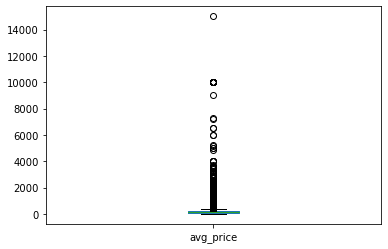

In [25]:
# Inspect the distribution of the avg_price attribute
host_data['avg_price'].plot(kind='box')